In [7]:
import pandas as pd

In [8]:
# filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-05/2011/ccr05_20111017.txt"

In [11]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-05/2012/ccr05_20120201.txt"

In [13]:
with open(filePath, 'r') as text:
    textfile = text.read()
    # print(textfile)

In [11]:
df = pd.read_csv(filePath)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 5


In [ ]:
print(df)

       time   setpt    T_ccr   T_sample    T_can   heater
0        22    50.0  291.047    293.027  292.915      0.0
1        24     0.0  290.959    293.024  292.912      0.0
2        34     0.0  290.645    293.011  292.901      0.0
3        44     0.0  290.320    292.996  292.889      0.0
4        54     0.0  289.994    292.978  292.876      0.0
...     ...     ...      ...        ...      ...      ...
8857  88584    90.0   90.001     90.017   89.748     24.4
8858  88594    90.0   90.001     90.018   89.748     24.4
8859  88604    90.0   90.000     90.018   89.750     24.4
8860  88614    90.0   90.000     90.019   89.749     24.4
8861  88624    90.0   90.000     90.019   89.750     24.4

[8862 rows x 6 columns]


In [ ]:
headers = ['time', 'setpt', 'T_ccr', 'T_sample', 'T_can', 'heater']
df = pd.read_csv(filePath, names=headers)

In [ ]:
plt.plot(df.time, df.setpt)
plt.plot(df.time, df.T_ccr) 
plt.plot(df.time, df.heater)
plt.plot(df.time, df.T_can)
plt.plot(df.time, df.T_sample)

# df.T_can, df.heater

In [87]:
dataPath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-05/2014/20K Steps_ 20-140.JPG"

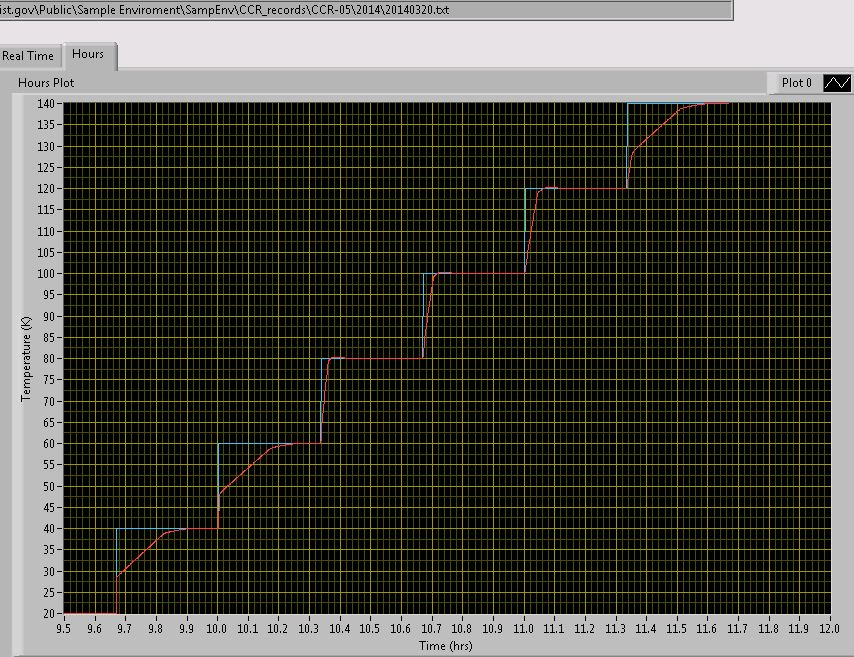

In [88]:
from IPython.display import Image, display
display(Image(filename=dataPath))

In [ ]:
filePath = "ccr05_20120201.txt"

In [1]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-05/2014/ccr-05-08/20140924.txt"

In [6]:
with open(filePath, 'r') as text:
    textfile = text.read()
    # print(textfile)

In [93]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

timestamps = []
values = []

count = 0
with open(filePath, 'r') as file:
    for line in file:
        if count > 1:
            line = line.strip().split(',')
            timestamp = datetime.strptime(line[0], '%I:%M:%S %p')
            # print(timestamp)
            value = float(line[3])  # Assuming the value is in the second column
            timestamps.append(timestamp)
            values.append(value)
        else:
            count += 1

fig, ax = plt.subplots()
ax.plot(timestamps, values)

# Format x-axis labels as time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Data Plot')

# Display the graph
plt.show()


ValueError: time data '9/24/2014 4:55:50 PM\t0.177068\t0.000000\t293.728000\t293.792000\t0.000000\t4.000000\t1.000000\t1.000000\t0.574070\t0.573920' does not match format '%I:%M:%S %p'

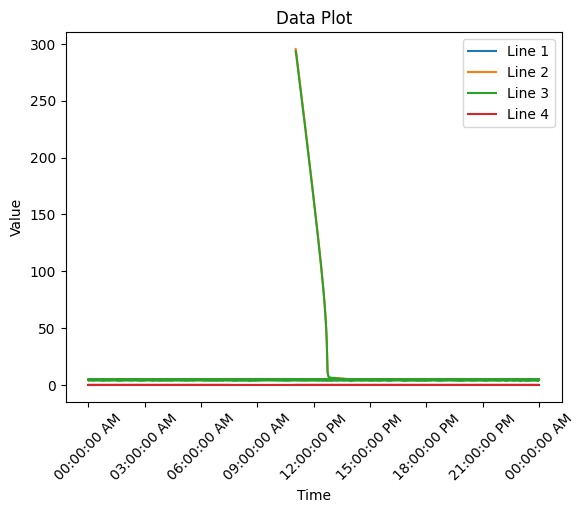

In [68]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

timestamps = []
values = [[] for _ in range(4)]  # List of empty lists for four lines

count =  0
with open(filePath, 'r') as file:
    for line in file:
        if count > 1:
            line = line.strip().split(',')
            timestamp = datetime.strptime(line[0], '%I:%M:%S %p')
            for i in range(4):
                value = float(line[i+1])  # Assuming values are in columns 1 to 4
                values[i].append(value)
            timestamps.append(timestamp)
        else:
            count += 1

fig, ax = plt.subplots()

for i in range(4):
    ax.plot(timestamps, values[i], label=f'Line {i+1}')

# Format x-axis labels as time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Data Plot')

# Display the graph
plt.show()

In [84]:
# filePath = 
# importing required modules
import PyPDF2
  
# creating a pdf file object
pdfFileObj = open('/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-05/2012/CCR05_Basetemp_20120131.pdf', 'rb')
  
# creating a pdf reader object
pdfReader = PyPDF2.PdfReader(pdfFileObj)
  
# printing number of pages in pdf file
print(len(pdfReader.pages))
  
# creating a page object
pageObj = pdfReader.pages[0]

# extracting text from page
print(pageObj.extract_text())
  
# closing the pdf file object
pdfFileObj.close()

1
01 2 3 4 5 050100150200250300temperature (K)t
ime (hours) sensor A 
sensor Bb ase temp=4.7K


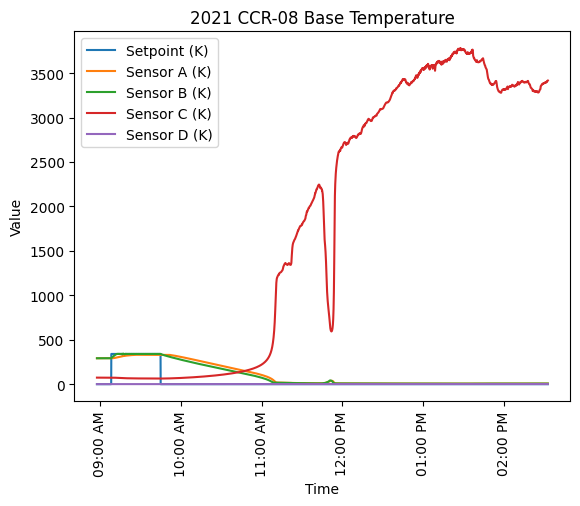

In [24]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-08/20210921  base temp with 340 spike.txt"
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

timestamps = []
values = [[] for _ in range(10)]  # List of empty lists for ten lines

with open(filePath, 'r') as file:
    for line in file:
        line = line.strip().split('\t')
        timestamp = datetime.strptime(line[0], '%m/%d/%Y %I:%M:%S %p')
        for i in range(10):
            value = float(line[i+1])  # Assuming values are in columns 1 to 10
            values[i].append(value)
        timestamps.append(timestamp)

fig, ax = plt.subplots()

# ax.plot(timestamps, values[0], label='Elapsed Time')
ax.plot(timestamps, values[1], label='Setpoint (K)')
ax.plot(timestamps, values[2], label='Sensor A (K)')
ax.plot(timestamps, values[3], label='Sensor B (K)')
# ax.plot(timestamps, values[4], label='Elapsed Time')
# ax.plot(timestamps, values[5], label='Elapsed Time')
# ax.plot(timestamps, values[6], label='Elapsed Time')
# ax.plot(timestamps, values[7], label='Elapsed Time')
ax.plot(timestamps, values[8], label='Sensor C (K)')
ax.plot(timestamps, values[9], label='Sensor D (K)')



# for i in range(1, 10):
#     ax.plot(timestamps, values[i], label=f'Line {i+1}')

# Format x-axis labels as time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I:%M %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels, legend, and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('2021 CCR-08 Base Temperature')

# Display the graph
plt.show()


In [85]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-05/2014/ccr-05-08/20140919.txt"
count = 0
with open(filePath, 'r') as text:
    for line in text:
        count += 1
        if count < 10:
            print(line)

9/19/2014 2:17:06 PM	0.015018	0.000000	293.502000	293.555000	0.000000	4.000000	1.000000	1.000000	0.574590	0.574470

9/19/2014 2:17:08 PM	0.058573	0.000000	293.501000	293.555000	0.000000	4.000000	1.000000	1.000000	0.574590	0.574470

9/19/2014 2:17:13 PM	0.142331	0.000000	293.502000	293.555000	0.000000	4.000000	1.000000	1.000000	0.574590	0.574470

9/19/2014 2:17:18 PM	0.225239	0.000000	293.502000	293.556000	0.000000	4.000000	1.000000	1.000000	0.574590	0.574460

9/19/2014 2:17:23 PM	0.308998	0.000000	293.502000	293.556000	0.000000	4.000000	1.000000	1.000000	0.574590	0.574460

9/19/2014 2:17:28 PM	0.392739	0.000000	293.500000	293.554000	0.000000	4.000000	1.000000	1.000000	0.574590	0.574470

9/19/2014 2:17:33 PM	0.475664	0.000000	293.477000	293.529000	0.000000	4.000000	1.000000	1.000000	0.574640	0.574520

9/19/2014 2:17:38 PM	0.559406	0.000000	293.408000	293.460000	0.000000	4.000000	1.000000	1.000000	0.574790	0.574680

9/19/2014 2:17:43 PM	0.642331	0.000000	293.302000	293.351000	0.000000	4.

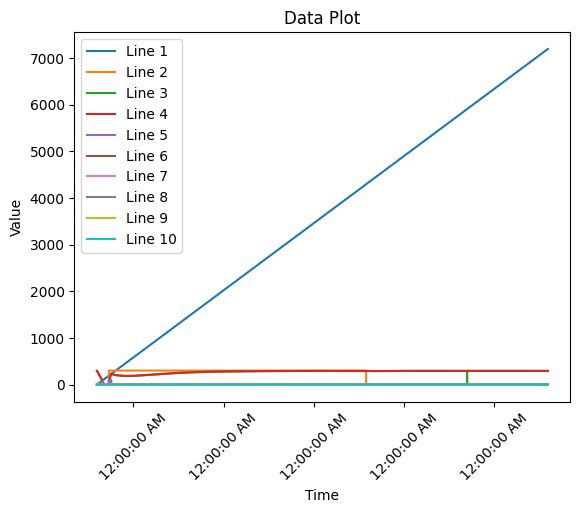

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

timestamps = []
values = [[] for _ in range(10)]  # List of empty lists for ten lines

with open(filePath, 'r') as file:
    for line in file:
        line = line.strip().split('\t')
        timestamp = datetime.strptime(line[0], '%m/%d/%Y %I:%M:%S %p')
        for i in range(10):
            value = float(line[i+1])  # Assuming values are in columns 1 to 10
            values[i].append(value)
        timestamps.append(timestamp)

fig, ax = plt.subplots()

for i in range(10):
    ax.plot(timestamps, values[i], label=f'Line {i+1}')

# Format x-axis labels as time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Data Plot')

# Display the graph
plt.show()


In [17]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-05/2014/20140320.txt"
with open(filePath, 'r') as text:
    textfile = text.read()
    # print(textfile)

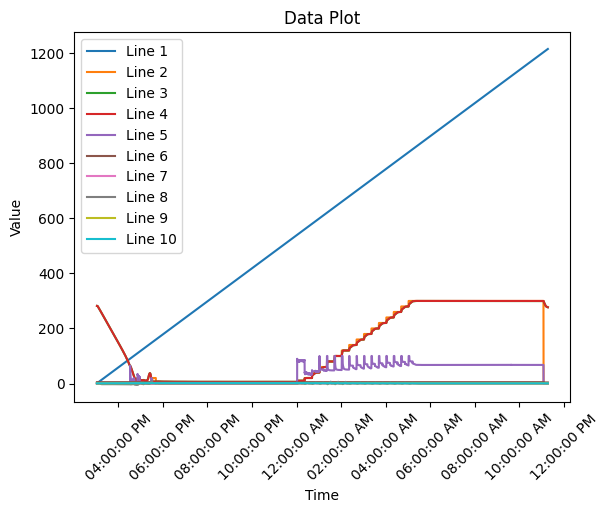

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

timestamps = []
values = [[] for _ in range(10)]  # List of empty lists for ten lines

with open(filePath, 'r') as file:
    for line in file:
        line = line.strip().split('\t')
        timestamp = datetime.strptime(line[0], '%m/%d/%Y %I:%M:%S %p')
        for i in range(10):
            value = float(line[i+1])  # Assuming values are in columns 1 to 10
            values[i].append(value)
        timestamps.append(timestamp)

fig, ax = plt.subplots()

for i in range(10):
    ax.plot(timestamps, values[i], label=f'Line {i+1}')

# Format x-axis labels as time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Data Plot')

# Display the graph
plt.show()


In [21]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-05/2021/20210304.txt"
count = 0
with open(filePath, 'r') as text:
    for line in text:
        count += 1
        if count < 10:
            print(line)
    # textfile = text.read()
    # print(textfile)

3/4/2021 9:57:49 AM	5.182318	0.000000	1.000000	5.568700	0.000000	0.000000	1.000000	1.000000	2.551400	1.530150

3/4/2021 9:57:52 AM	5.231488	0.000000	1.000000	5.577900	0.000000	0.000000	1.000000	1.000000	2.551400	1.530600

3/4/2021 9:57:57 AM	5.311529	0.000000	1.000000	5.555900	0.000000	0.000000	1.000000	1.000000	2.551400	1.531070

3/4/2021 9:58:02 AM	5.392152	0.000000	1.000000	5.566000	0.000000	0.000000	1.000000	1.000000	2.551400	1.531190

3/4/2021 9:58:06 AM	5.472226	0.000000	1.000000	5.570700	0.000000	0.000000	1.000000	1.000000	2.551400	1.530560

3/4/2021 9:58:11 AM	5.552867	0.000000	1.000000	5.568600	0.000000	0.000000	1.000000	1.000000	2.551400	1.531100

3/4/2021 9:58:16 AM	5.632991	0.000000	1.000000	5.569700	0.000000	0.000000	1.000000	1.000000	2.551400	1.530640

3/4/2021 9:58:21 AM	5.713527	0.000000	1.000000	5.591300	0.000000	0.000000	1.000000	1.000000	2.551400	1.530350

3/4/2021 9:58:26 AM	5.793658	0.000000	1.000000	5.599500	0.000000	0.000000	1.000000	1.000000	2.551400	1.529600



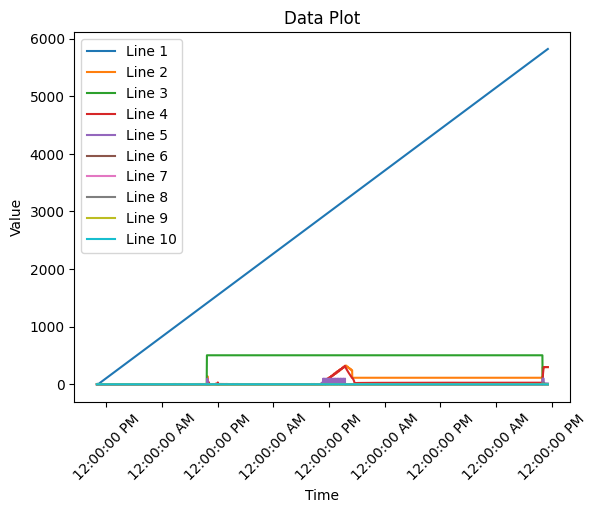

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

timestamps = []
values = [[] for _ in range(10)]  # List of empty lists for ten lines

with open(filePath, 'r') as file:
    for line in file:
        line = line.strip().split('\t')
        timestamp = datetime.strptime(line[0], '%m/%d/%Y %I:%M:%S %p')
        for i in range(10):
            value = float(line[i+1])  # Assuming values are in columns 1 to 10
            values[i].append(value)
        timestamps.append(timestamp)

fig, ax = plt.subplots()

for i in range(10):
    ax.plot(timestamps, values[i], label=f'Line {i+1}')

# Format x-axis labels as time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Data Plot')

# Display the graph
plt.show()


In [26]:
# filePath = 
# importing required modules
import PyPDF2
  
# creating a pdf file object
pdfFileObj = open('/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-05/Document1.pdf', 'rb')
  
# creating a pdf reader object
pdfReader = PyPDF2.PdfReader(pdfFileObj)
  
# printing number of pages in pdf file
print(len(pdfReader.pages))
  
# creating a page object
pageObj = pdfReader.pages[0]

# extracting text from page
print(pageObj.extract_text())
  
# closing the pdf file object
pdfFileObj.close()

1
 



In [27]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-05/2012/ccr05_20120201.txt"
count = 0
with open(filePath, 'r') as text:
    for line in text:
        count += 1
        if count < 10:
            print(line)
    # textfile = text.read()
    # print(textfile)

base and PID test of CCR-05

2/1/2012 8:31:52 AM

8:31:57 AM,0.000000,295.430000,293.420000,0.000000

8:32:23 AM,0.000000,295.440000,293.440000,0.000000

8:32:54 AM,0.000000,294.830000,292.820000,0.000000

8:33:24 AM,0.000000,293.720000,291.710000,0.000000

8:33:54 AM,0.000000,292.520000,290.520000,0.000000

8:34:24 AM,0.000000,291.310000,289.320000,0.000000

8:34:55 AM,0.000000,290.110000,288.130000,0.000000



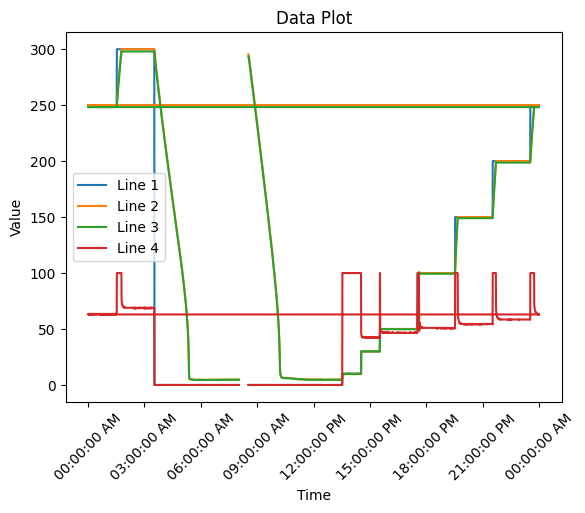

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

timestamps = []
values = [[] for _ in range(4)]  # List of empty lists for four lines

count =  0
with open(filePath, 'r') as file:
    for line in file:
        if count > 1:
            line = line.strip().split(',')
            timestamp = datetime.strptime(line[0], '%I:%M:%S %p')
            for i in range(4):
                value = float(line[i+1])  # Assuming values are in columns 1 to 4
                values[i].append(value)
            timestamps.append(timestamp)
        else:
            count += 1

fig, ax = plt.subplots()

for i in range(4):
    ax.plot(timestamps, values[i], label=f'Line {i+1}')

# Format x-axis labels as time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S %p'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels, legend, and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Data Plot')

# Display the graph
plt.show()

In [86]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-06/CCR-06 zones.txt"
count = 0
with open(filePath, 'r') as text:
    for line in text:
        count += 1
        if count < 30:
            print(line)
    # textfile = text.read()
    # print(textfile)

Temp,P,I,D,heater%,heaterRange

10.000000,5.000000,100.000000,10.000000,0.000000,3.000000

20.000000,20.000000,50.000000,25.000000,0.000000,3.000000

35.000000,50.000000,20.000000,100.000000,0.000000,3.000000

100.000000,100.000000,50.000000,30.000000,0.000000,3.000000

263.000000,400.000000,35.000000,5.000000,0.000000,3.000000

287.000000,400.000000,30.000000,10.000000,0.000000,3.000000

325.000000,400.000000,25.000000,20.000000,0.000000,3.000000

0.000000,50.000000,20.000000,0.000000,0.000000,0.000000

0.000000,50.000000,20.000000,0.000000,0.000000,0.000000

0.000000,50.000000,20.000000,0.000000,0.000000,0.000000



In [50]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-06/2004/CCR-06 pid test 111004 T Falling.xls"
df = pd.read_excel(filePath)
df

,CCR-06 pid test 11/10/04 T Falling,minutes,percentage of heater power,sensor A,sensor B,Unnamed: 5
0,2004-11-12 14:32:42,NaN,NaN,NaN,NaN,NaN
1,2004-11-12 14:33:58,0.05,0.0,320.010,317.24,95.0
2,2004-11-12 14:34:02,0.10,91.0,320.010,317.24,95.0
3,2004-11-12 14:34:06,0.15,91.0,320.010,317.23,91.0
4,2004-11-12 14:34:10,0.20,91.0,320.000,317.23,91.0
...,...,...,...,...,...,...
58837,2004-11-15 08:12:08,NaN,0.0,18.902,30.00,0.0
58838,2004-11-15 08:12:12,NaN,0.0,18.945,30.00,0.0
58839,2004-11-15 08:12:16,NaN,0.0,18.952,30.00,0.0
58840,2004-11-15 08:12:20,NaN,0.0,18.864,30.00,0.0


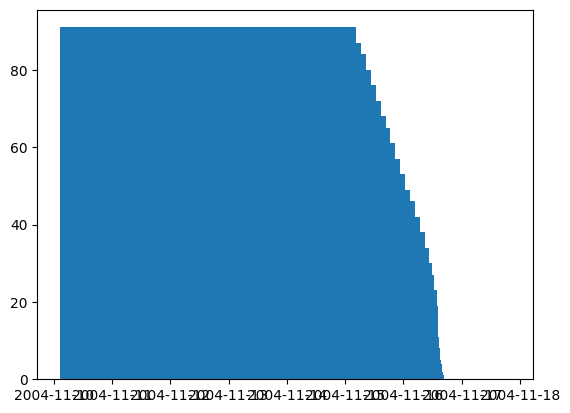

In [52]:
file = pd.read_excel(filePath)
x_axis = file['CCR-06 pid test 11/10/04 T Falling']
# print(x_axis)
y_axis = file['percentage of heater power']
plt.bar(x_axis, y_axis, width=5)
plt.show()

In [44]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-07/PIDs.txt"
count = 0
with open(filePath, 'r') as text:
    for line in text:
        count += 1
        if count < 10:
            print(line)
    # textfile = text.read()
    # print(textfile)

Temp,P,I,D,heater%,heaterRange

20.000000,50.000000,20.000000,1.000000,0.000000,4.000000

45.000000,258.000000,500.000000,0.000000,0.000000,5.000000

60.000000,258.000000,381.000000,0.000000,0.000000,5.000000

85.000000,258.000000,295.000000,0.000000,0.000000,5.000000

120.000000,258.000000,243.000000,1.000000,0.000000,5.000000

155.000000,440.000000,157.000000,1.000000,0.000000,5.000000

215.000000,318.000000,224.000000,1.000000,0.000000,5.000000

235.000000,550.000000,215.000000,1.000000,0.000000,5.000000



In [53]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-07/CCR-07_ZONES.TXT"
count = 0
with open(filePath, 'r') as text:
    for line in text:
        count += 1
        if count < 10:
            print(line)
    # textfile = text.read()
    # print(textfile)

Temp,P,I,D,heater%,heaterRange

65.000000,400.000000,400.000000,3.000000,0.000000,5.000000

120.000000,400.000000,100.000000,1.000000,0.000000,5.000000

165.000000,300.000000,75.000000,3.000000,0.000000,5.000000

235.000000,250.000000,55.000000,5.000000,0.000000,5.000000

325.000000,150.000000,5.000000,5.000000,0.000000,5.000000

100.000000,0.000000,0.000000,0.000000,0.000000,0.000000

100.000000,0.000000,0.000000,0.000000,0.000000,0.000000

100.000000,0.000000,0.000000,0.000000,0.000000,0.000000



In [56]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-07/2004/CCR-07 pid test111004 T Falling.xls"
df = pd.read_excel(filePath)
df

,CCR-07 pid test 111004 T Falling,minutes,percentage of heater power,sensor A,sensorB
0,2004-11-10 11:06:13,NaN,NaN,NaN,NaN
1,11:06:36,0.05,0.0,320.000,319.640
2,11:06:40,0.10,37.0,320.000,319.640
3,11:06:44,0.15,37.0,320.000,319.640
4,11:06:49,0.20,37.0,320.040,319.640
...,...,...,...,...,...
45292,13:35:33,2264.60,0.0,17.675,31.354
45293,13:35:37,2264.65,0.0,17.680,31.353
45294,13:35:41,2264.70,0.0,17.625,31.354
45295,13:35:45,2264.75,0.0,17.736,31.354


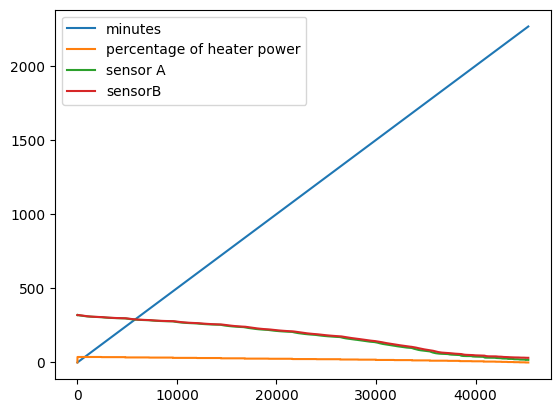

In [63]:
# file = pd.read_excel(filePath)
# x_axis = file["CCR-07 pid test 111004 T Falling"][1:]
# print(x_axis)
# # print(x_axis)
# y_axis = file['percentage of heater power'][1:]
# print(y_axis)
# plt.bar(x_axis, y_axis, width=5)
# plt.show()
fig = df.plot()
fig = fig.figure

In [66]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [79]:
filePath = "/storage/pkienzle/data/CCR-Data-Unlabeled/CCR-07/2010/ccr_07_base_temp_test.xlsx"
df = pd.read_excel(filePath)
df

,CCR-07 test PIDs after repair,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2010-12-10 13:18:36,time (sec),time (hrs),setpoint,temperature A (K),temeature B(K),heater power (%)
1,13:19:03,0,0,0,295.91,296.72,0
2,13:19:32,30,0.008333,0,294.08,294.91,0
3,13:20:02,60,0.016667,0,290.4,291.25,0
4,13:20:32,90,0.025,0,286.7,287.53,0
...,...,...,...,...,...,...,...
243,15:20:02,7260,2.016667,0,9.741,9.612,0
244,15:20:32,7290,2.025,0,9.702,9.583,0
245,15:21:02,7320,2.033333,0,9.658,9.528,0
246,15:21:32,7350,2.041667,0,9.749,9.627,0


In [82]:
df = df.drop(df. index[0])
df

,CCR-07 test PIDs after repair,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,13:19:03,0,0,0,295.91,296.72,0
2,13:19:32,30,0.008333,0,294.08,294.91,0
3,13:20:02,60,0.016667,0,290.4,291.25,0
4,13:20:32,90,0.025,0,286.7,287.53,0
5,13:21:02,120,0.033333,0,283.12,283.95,0
...,...,...,...,...,...,...,...
243,15:20:02,7260,2.016667,0,9.741,9.612,0
244,15:20:32,7290,2.025,0,9.702,9.583,0
245,15:21:02,7320,2.033333,0,9.658,9.528,0
246,15:21:32,7350,2.041667,0,9.749,9.627,0


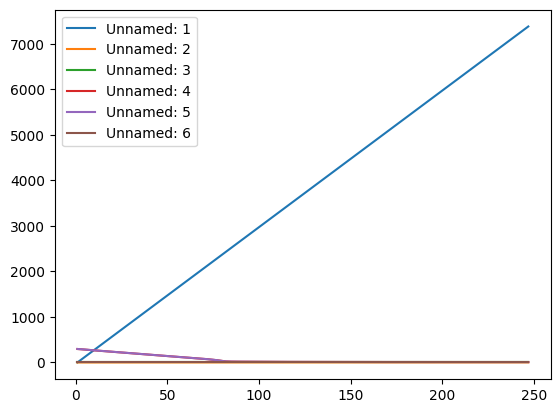

In [83]:
fig = df.plot()
fig = fig.figure